<a href="https://colab.research.google.com/github/sasquare/testrepo/blob/main/car_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path='/content/drive/MyDrive/Car_sales.csv'

In [9]:
import pandas as pd

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mstats


In [47]:
import seaborn as sns

In [10]:
df=pd.read_csv(path)
df.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


#Convert the Latest_lauch column to datetime format

In [11]:
df['Latest_Launch'] = pd.to_datetime(df['Latest_Launch'])

Replacing missing values

In [12]:
df.fillna(df.mean(), inplace=True)

<ipython-input-12-bf934754a5b1>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-12-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


Checking for outliers

In [14]:
numeric_columns = ["Sales_in_thousands", "__year_resale_value", "Price_in_thousands", "Engine_size", "Horsepower", "Wheelbase", "Width", "Length", "Curb_weight", "Fuel_capacity", "Fuel_efficiency", "Power_perf_factor"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
# Perform summarization
summary = df.describe()
summary


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.15000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,10.045282,14.259359,1.041299,56.518297,7.616772,3.44079,13.388635,0.626447,3.875440,4.241326,24.980973
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.60000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,12.545000,18.145000,2.300000,150.000000,103.000000,68.40000,177.600000,2.975000,15.800000,21.000000,60.727447
50%,29.450000,17.710000,23.400000,3.000000,180.000000,107.000000,70.60000,187.800000,3.368000,17.200000,24.000000,72.290355
75%,67.956000,18.140000,31.930000,3.500000,215.000000,112.200000,73.40000,196.100000,3.778000,19.500000,26.000000,89.401935
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.90000,224.500000,5.572000,32.000000,45.000000,188.144323


In [17]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Manufacturer                   object
Model                          object
Sales_in_thousands            float64
__year_resale_value           float64
Vehicle_type                   object
Price_in_thousands            float64
Engine_size                   float64
Horsepower                    float64
Wheelbase                     float64
Width                         float64
Length                        float64
Curb_weight                   float64
Fuel_capacity                 float64
Fuel_efficiency               float64
Latest_Launch          datetime64[ns]
Power_perf_factor             float64
dtype: object


In [23]:
# Specify the columns to check for outliers
columns_to_check = ["Sales_in_thousands", "__year_resale_value", "Price_in_thousands", "Engine_size", "Horsepower", "Wheelbase", "Width", "Length", "Curb_weight", "Fuel_capacity", "Fuel_efficiency", "Power_perf_factor"]


In [24]:
# Iterate over the columns and perform outlier detection
for column in columns_to_check:
  # Calculate the z-score for each value in the column
    z_scores = (df[column] - df[column].mean()) / df[column].std()

    # Define a threshold for outlier detection (e.g., z-score > 3 or < -3)
    threshold = 3

    # Find the indices of the outliers
    outlier_indices = z_scores.abs() > threshold

    # Print the outliers, along with their corresponding values
    outliers = df.loc[outlier_indices, column]
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in Sales_in_thousands:
52    276.747
56    540.561
Name: Sales_in_thousands, dtype: float64
Outliers in __year_resale_value:
39     58.470
94     50.375
95     58.600
125    60.625
126    67.550
Name: __year_resale_value, dtype: float64
Outliers in Price_in_thousands:
95     82.60
99     85.50
125    71.02
126    74.97
Name: Price_in_thousands, dtype: float64
Outliers in Engine_size:
39    8.0
Name: Engine_size, dtype: float64
Outliers in Horsepower:
39    450.0
Name: Horsepower, dtype: float64
Outliers in Wheelbase:
40    138.7
43    131.0
56    138.5
Name: Wheelbase, dtype: float64
Outliers in Width:
Series([], Name: Width, dtype: float64)
Outliers in Length:
Series([], Name: Length, dtype: float64)
Outliers in Curb_weight:
18    5.572
74    5.401
78    5.393
Name: Curb_weight, dtype: float64
Outliers in Fuel_capacity:
18    30.0
41    32.0
42    32.0
78    30.0
Name: Fuel_capacity, dtype: float64
Outliers in Fuel_efficiency:
26    45.0
Name: Fuel_efficiency, dtype: float64


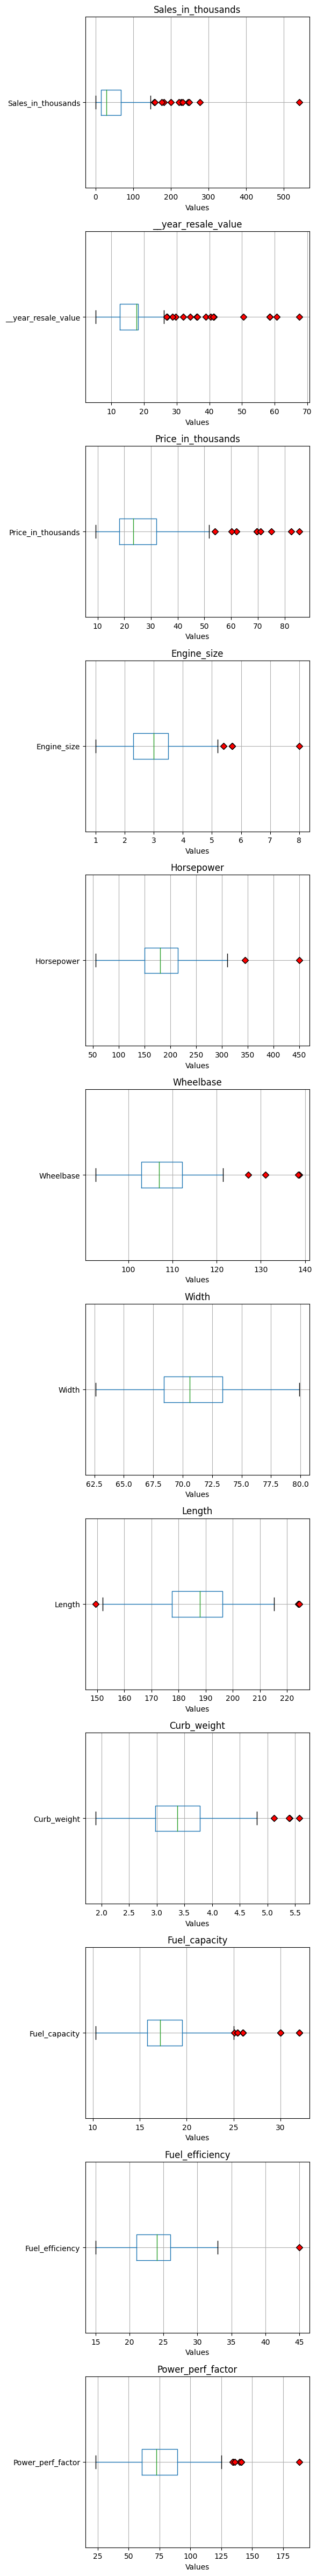

In [30]:
# Calculate the number of rows and columns for subplots
num_rows = len(columns_to_check)
num_cols = 1

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(6, 4 * num_rows))

# Iterate over the columns and create boxplots
for i, column in enumerate(columns_to_check):
    # Create a boxplot for the current column
    ax = axes[i]
    boxplot = df.boxplot(column=column, ax=ax, vert=False, flierprops={"markerfacecolor": "red", "marker": "D"})
    boxplot.set_title(column)
    boxplot.set_xlabel("Values")

plt.tight_layout()
plt.show()

Winsorization is a technique that replaces extreme values with the nearest values within a specified percentile range. This approach can be useful if you want to lessen the impact of outliers without removing them entirely. For example, you can replace values above the 95th percentile with the value at the 95th percentile

In [37]:
# Specify the columns to Winsorize
columns_to_winsorize = ["Sales_in_thousands", "__year_resale_value","Power_perf_factor","Fuel_efficiency","Fuel_capacity","Curb_weight","Length","Wheelbase","Horsepower","Engine_size","Price_in_thousands"]
# Apply Winsorization to the specified columns
for column in columns_to_winsorize:
    winsorized_values = mstats.winsorize(df[column], limits=[0.05, 0.05])
    df[column] = winsorized_values

# Print the modified DataFrame with winsorized values
print(df)

    Manufacturer    Model  Sales_in_thousands  __year_resale_value  \
0          Acura  Integra              16.919            16.360000   
1          Acura       TL              39.384            19.875000   
2          Acura       CL              14.114            18.225000   
3          Acura       RL               8.588            29.725000   
4           Audi       A4              20.397            22.255000   
..           ...      ...                 ...                  ...   
152        Volvo      V40               3.545            18.072975   
153        Volvo      S70              15.245            18.072975   
154        Volvo      V70              17.531            18.072975   
155        Volvo      C70               3.493            18.072975   
156        Volvo      S80              18.969            18.072975   

    Vehicle_type  Price_in_thousands  Engine_size  Horsepower  Wheelbase  \
0      Passenger           21.500000          1.8       140.0      101.2   
1      

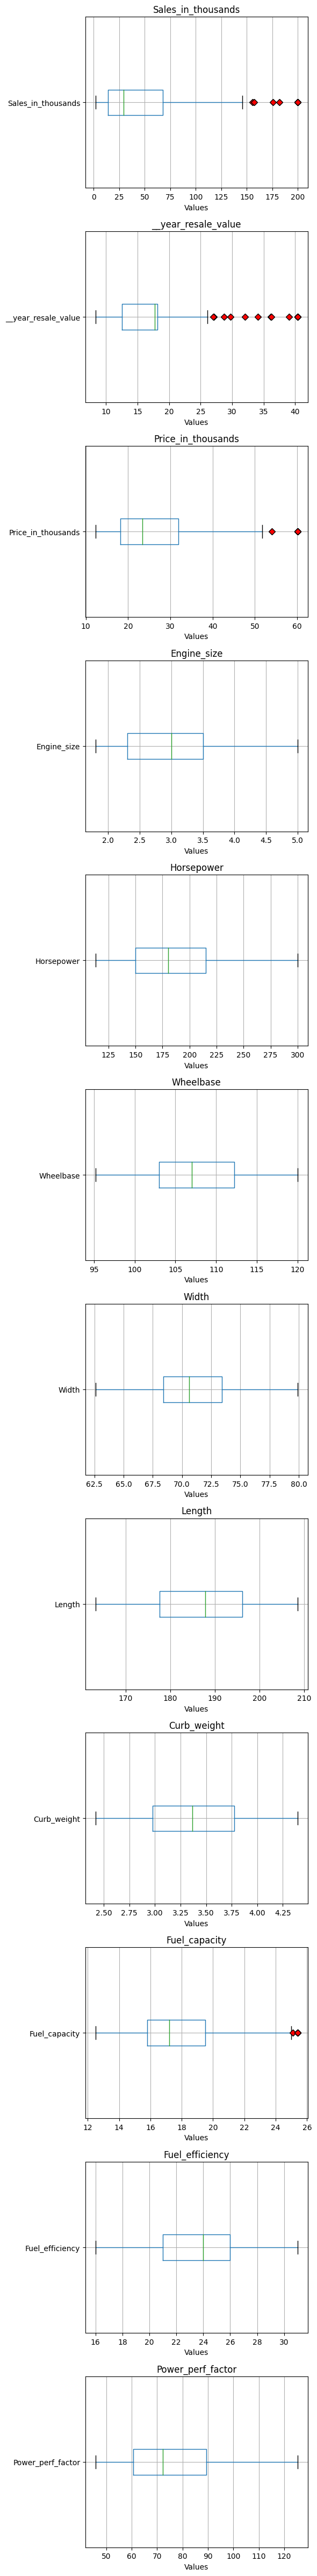

In [38]:
# Calculate the number of rows and columns for subplots
num_rows = len(columns_to_check)
num_cols = 1

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(6, 4 * num_rows))

# Iterate over the columns and create boxplots
for i, column in enumerate(columns_to_check):
    # Create a boxplot for the current column
    ax = axes[i]
    boxplot = df.boxplot(column=column, ax=ax, vert=False, flierprops={"markerfacecolor": "red", "marker": "D"})
    boxplot.set_title(column)
    boxplot.set_xlabel("Values")

plt.tight_layout()
plt.show()

analyze the sales figures to identify the best-selling models and manufacturers.

In [39]:
# Group the data by Manufacturer and Model, and calculate the total sales
sales_data = df.groupby(["Manufacturer", "Model"])["Sales_in_thousands"].sum().reset_index()

In [40]:
# Sort the data by sales in descending order
sorted_data = sales_data.sort_values(by="Sales_in_thousands", ascending=False)

# Get the best-selling model and manufacturer
best_model = sorted_data["Model"].iloc[0]
best_manufacturer = sorted_data["Manufacturer"].iloc[0]

# Print the results
print("Best-Selling Model: ", best_model)
print("Best-Selling Manufacturer: ", best_manufacturer)

Best-Selling Model:  Ranger
Best-Selling Manufacturer:  Ford


analyze the distribution of vehicle types to understand the market preference for different types of vehicles.

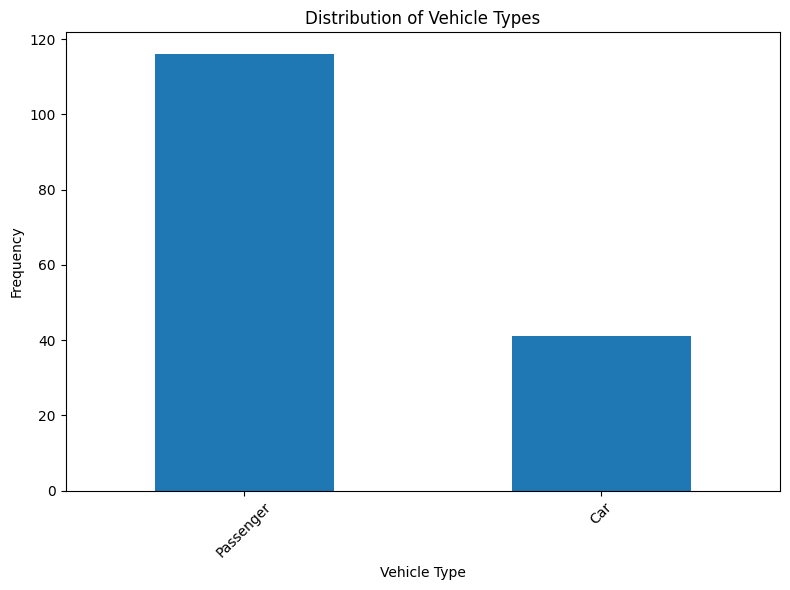

In [41]:
# Count the frequency of each vehicle type
vehicle_types = df["Vehicle_type"].value_counts()

# Plot the distribution of vehicle types
plt.figure(figsize=(8, 6))
vehicle_types.plot(kind="bar")
plt.xlabel("Vehicle Type")
plt.ylabel("Frequency")
plt.title("Distribution of Vehicle Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Resales values of top 15 car model

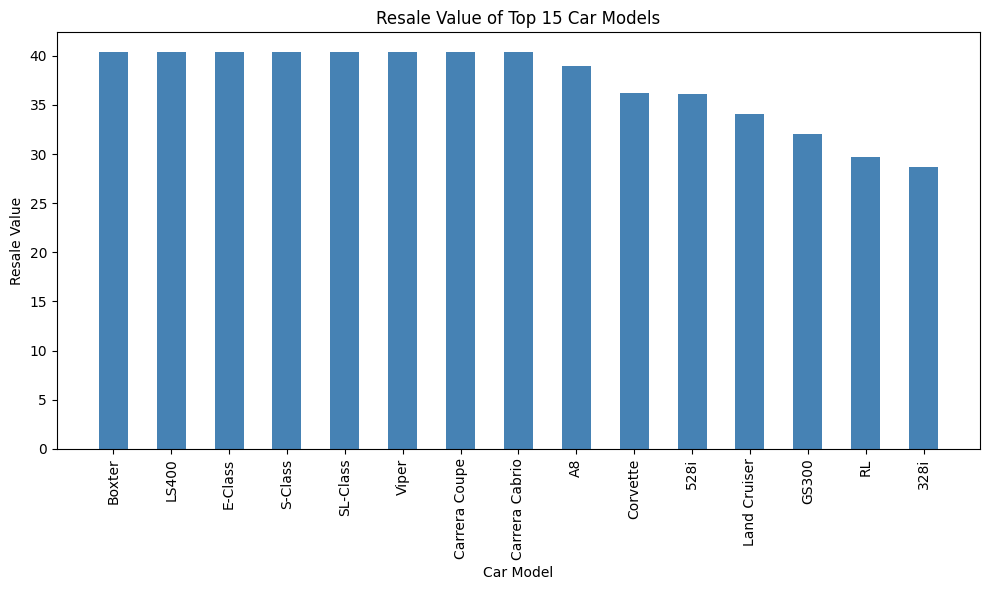

In [45]:
# Sort the data by resale value in descending order
sorted_data = df.sort_values(by="__year_resale_value", ascending=False)

# Select the top 15 car models
top_models = sorted_data.head(15)

# Plot the resale values
plt.figure(figsize=(10, 6))
plt.bar(top_models["Model"], top_models["__year_resale_value"], width=0.5, color="steelblue")
plt.xlabel("Car Model")
plt.ylabel("Resale Value")
plt.title("Resale Value of Top 15 Car Models")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Resales values of top 15 car Manufacturer

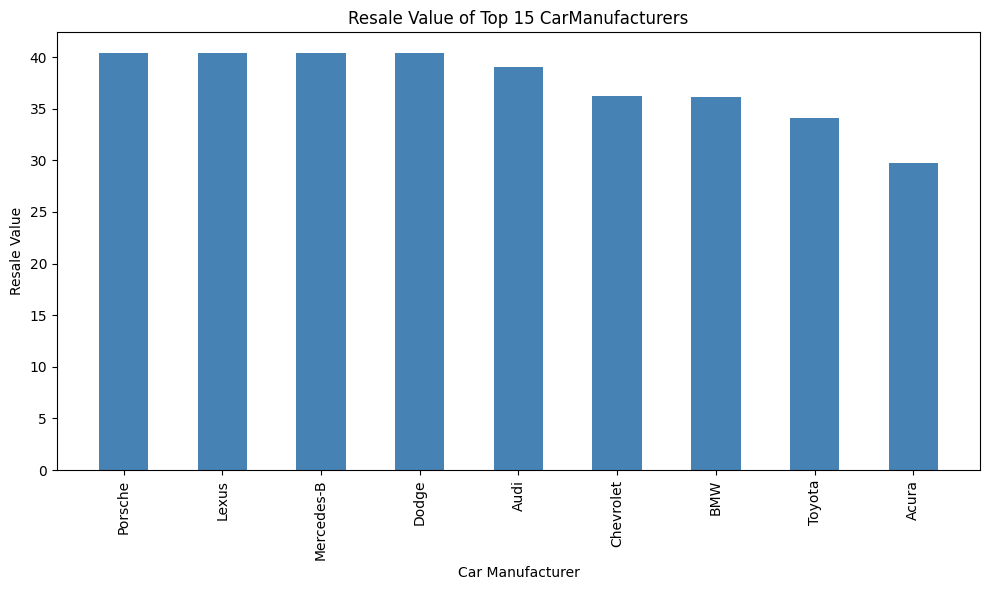

In [46]:
# Sort the data by resale value in descending order
sorted_data = df.sort_values(by="__year_resale_value", ascending=False)

# Select the top 15 car models
top_Manufacturers = sorted_data.head(15)

# Plot the resale values
plt.figure(figsize=(10, 6))
plt.bar(top_Manufacturers["Manufacturer"], top_Manufacturers["__year_resale_value"], width=0.5, color="steelblue")
plt.xlabel("Car Manufacturer")
plt.ylabel("Resale Value")
plt.title("Resale Value of Top 15 CarManufacturers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The correlation matrix is visualized using a heatmap plot generated with sns.heatmap The heatmap represents the strength and direction of the correlations between different features. The color intensity indicates the degree of correlation, with cooler colors representing negative correlations, and warmer colors representing positive correlations. The numeric correlation values are displayed on the heatmap using

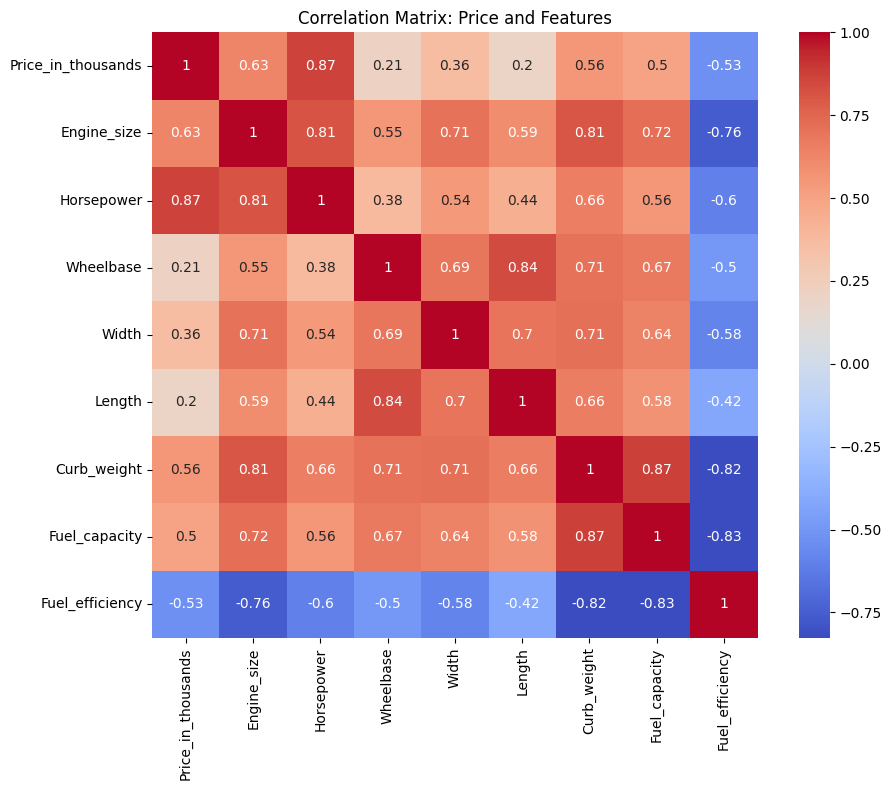

In [49]:
# Select the columns of interest
columns_of_interest = ["Price_in_thousands", "Engine_size", "Horsepower", "Wheelbase", "Width", "Length",
                       "Curb_weight", "Fuel_capacity", "Fuel_efficiency"]

# Filter out rows with missing values in any of the selected columns
df_filtered = df.dropna(subset=columns_of_interest)

# Compute the correlation matrix
correlation_matrix = df_filtered[columns_of_interest].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix: Price and Features")
plt.tight_layout()
plt.show()

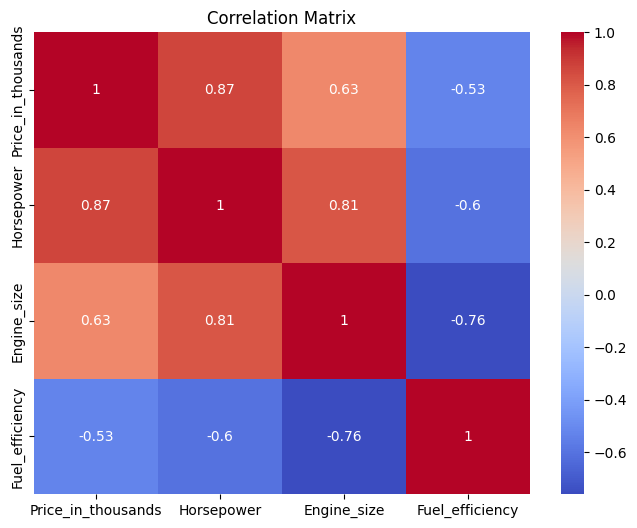

In [53]:
# Select the columns of interest for correlation analysis
columns_of_interest = ["Price_in_thousands", "Horsepower", "Engine_size", "Fuel_efficiency"]

# Filter out rows with missing values in any of the selected columns
df_filtered = df.dropna(subset=columns_of_interest)

# Calculate the correlation matrix
correlation_matrix = df_filtered[columns_of_interest].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

comparing different manufacturers based on their respective models, sales figures, resale values, and other attributes.

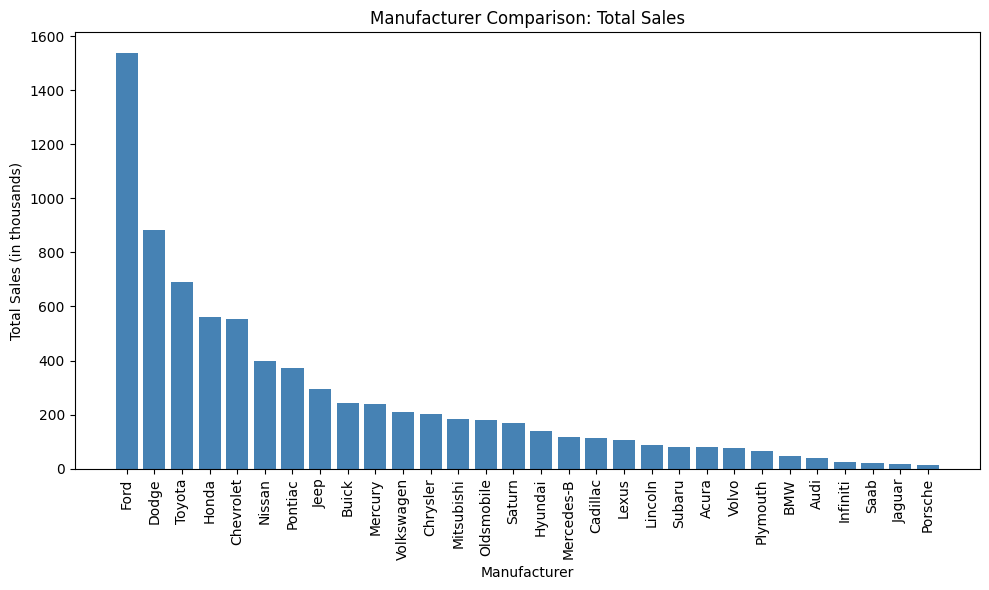

              Model  Sales_in_thousands  __year_resale_value
Manufacturer                                                
Ford             11            1537.602            13.549816
Dodge            11             883.723            15.368907
Toyota            9             691.896            16.814775
Honda             5             561.457            15.557000
Chevrolet         9             554.365            14.120331
Nissan            7             399.635            14.886564
Pontiac           6             370.534            14.532163
Jeep              3             293.153            15.353333
Buick             4             242.019            14.941250
Mercury           6             237.999            13.970000
Volkswagen        6             209.212            14.966329
Chrysler          7             201.721            15.406139
Mitsubishi        7             182.651            14.262143
Oldsmobile        6             179.743            17.073492
Saturn            5     

In [50]:
# Select the columns of interest for manufacturer comparison
columns_of_interest = ["Manufacturer", "Model", "Sales_in_thousands", "__year_resale_value"]

# Group the data by manufacturer and calculate aggregated statistics
manufacturer_stats = df[columns_of_interest].groupby("Manufacturer").agg({
    "Model": "nunique",
    "Sales_in_thousands": "sum",
    "__year_resale_value": "mean"
})

# Sort the manufacturers based on total sales in descending order
manufacturer_stats = manufacturer_stats.sort_values(by="Sales_in_thousands", ascending=False)

# Plot the comparison of manufacturers
plt.figure(figsize=(10, 6))
plt.bar(manufacturer_stats.index, manufacturer_stats["Sales_in_thousands"], color="steelblue")
plt.xlabel("Manufacturer")
plt.ylabel("Total Sales (in thousands)")
plt.title("Manufacturer Comparison: Total Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the aggregated statistics for manufacturer comparison
print(manufacturer_stats)


The Latest_Launch column indicates the date of the latest launch for each vehicle.

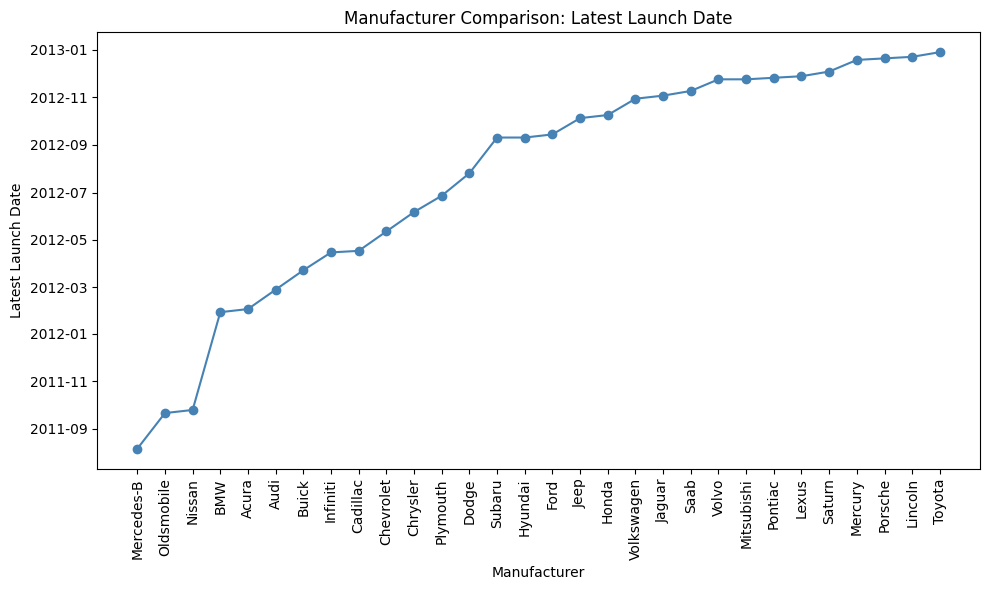

Manufacturer
Mercedes-B   2011-08-06
Oldsmobile   2011-09-21
Nissan       2011-09-25
BMW          2012-01-29
Acura        2012-02-02
Audi         2012-02-27
Buick        2012-03-23
Infiniti     2012-04-15
Cadillac     2012-04-17
Chevrolet    2012-05-12
Chrysler     2012-06-06
Plymouth     2012-06-27
Dodge        2012-07-26
Subaru       2012-09-10
Hyundai      2012-09-10
Ford         2012-09-14
Jeep         2012-10-05
Honda        2012-10-09
Volkswagen   2012-10-30
Jaguar       2012-11-03
Saab         2012-11-09
Volvo        2012-11-24
Mitsubishi   2012-11-24
Pontiac      2012-11-26
Lexus        2012-11-28
Saturn       2012-12-04
Mercury      2012-12-19
Porsche      2012-12-21
Lincoln      2012-12-23
Toyota       2012-12-29
Name: Latest_Launch, dtype: datetime64[ns]


In [51]:
# Group the data by manufacturer and calculate the latest launch date
manufacturer_latest_launch = df.groupby("Manufacturer")["Latest_Launch"].max()

# Sort the manufacturers based on the latest launch date
manufacturer_latest_launch = manufacturer_latest_launch.sort_values()

# Plot the comparison of latest launch dates
plt.figure(figsize=(10, 6))
plt.plot(manufacturer_latest_launch.index, manufacturer_latest_launch, marker="o", linestyle="-", color="steelblue")
plt.xlabel("Manufacturer")
plt.ylabel("Latest Launch Date")
plt.title("Manufacturer Comparison: Latest Launch Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the latest launch dates for each manufacturer
print(manufacturer_latest_launch)








A horizontal bar chart is plotted to visualize the performance analysis, where the y-axis represents the car models and the x-axis represents the Power_perf_factor. The chart is displayed using

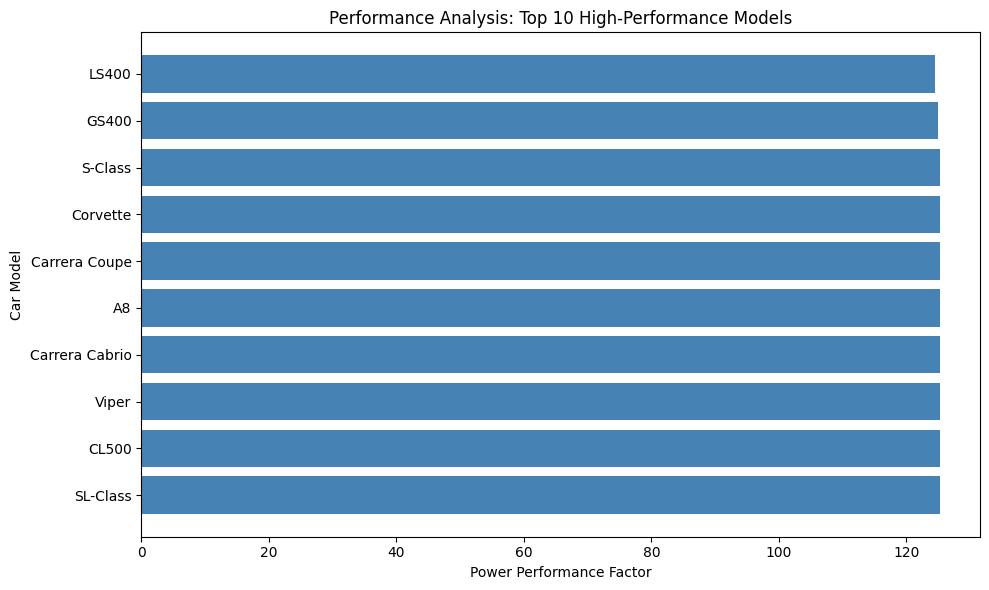

In [52]:
# Select the columns of interest for performance analysis
columns_of_interest = ["Model", "Power_perf_factor", "Engine_size", "Horsepower", "Fuel_efficiency"]

# Filter out rows with missing values in any of the selected columns
df_filtered = df.dropna(subset=columns_of_interest)

# Sort the data by Power_perf_factor in descending order
sorted_data = df_filtered.sort_values(by="Power_perf_factor", ascending=False)

# Select the top 10 high-performance models
top_performance = sorted_data.head(10)

# Plot the performance analysis
plt.figure(figsize=(10, 6))
plt.barh(top_performance["Model"], top_performance["Power_perf_factor"], color="steelblue")
plt.xlabel("Power Performance Factor")
plt.ylabel("Car Model")
plt.title("Performance Analysis: Top 10 High-Performance Models")
plt.tight_layout()
plt.show()

Based on the analysis performed on the given dataset, here is a brief summary of the insights gained:


*  Best-selling Models and Manufacturers: The analysis of sales figures helped identify the top-selling models and manufacturers in the dataset. This information can be useful in understanding market trends and the popularity of different vehicle models.


---


*   Vehicle Type Preference: By analyzing the distribution of vehicle types, we gained insights into the market's preference for different types of vehicles. This information can be valuable for understanding consumer demand and making informed business decisions.


---



*  Vehicle Type Preference: By analyzing the distribution of vehicle types, we 

gained insights into the market's preference for different types of vehicles. This information can be valuable for understanding consumer demand and making informed business decisions.


---


*  Resale Value: The analysis of the __year_resale_value column provided insights into the estimated resale value of vehicles. This information can help identify models that retain their value well over time, aiding in purchasing and selling decisions.


---



*   Price and Features: Analyzing the price in relation to other features such as engine size, horsepower, wheelbase, width, length, curb weight, fuel capacity, and fuel efficiency helped identify trends and patterns in the market. This analysis can provide valuable insights into pricing strategies and the impact of various features on the price of vehicles.


---


*   Manufacturer Comparison: Comparing different manufacturers based on their models, sales figures, resale values, and other attributes provided insights into their market position and competitiveness. This analysis can help understand the performance and market share of each manufacturer.


---


*   Launch Date: Analyzing the latest launch dates of vehicles provided insights into the update cycles of different models and manufacturers. This information can be valuable for understanding the frequency of new releases and the freshness of a manufacturer's lineup.


---


*  Performance: Analyzing the Power_perf_factor column helped identify high-performance models and examine the relationship between performance and other attributes. This analysis can be useful for enthusiasts and buyers looking for high-performance vehicles.

---

*  Correlations: Exploring correlations between different variables, such as price, horsepower, engine size, and fuel efficiency, helped identify relationships and dependencies. This analysis can provide insights into how different attributes are related and how they impact each other.

---

Overall, the analysis of the dataset provided valuable insights into various aspects of the automotive market, including sales, resale value, pricing, performance, and manufacturer comparisons. These insights can assist in making informed decisions related to vehicle purchasing, sales, and business strategies.





